In [7]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:

# y = w * x + b 함수
def myfunc(x):
  w = 2.3 # 기울기
  b = 3.6 # y 절편.  점(0, 2.6)
  # x 절편은 점(-2, 0)이 됨.
  y = w * x + b
  noise = random.random() * 0.2 # Noise
  return y + noise

In [9]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 20          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [10]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.588765207381789, 0.7726180349611195, 1.0128325706894166]
ytrain : [5.007754329210724, 5.422188147544435, 6.086353779635508]


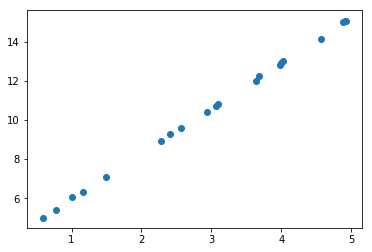

In [11]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [12]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape',xtrain.shape)  # shape ==  (10,)
print('ylist.shape',ytrain.shape)  # shape ==  (10,)
xlist.shape : (20,)
ylist.shape : (20,)

SyntaxError: invalid syntax (<ipython-input-12-7766d6b63c66>, line 7)

In [13]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)
xlist.shape : (20, 1)
ylist.shape : (20, 1)

SyntaxError: invalid syntax (<ipython-input-13-1f788febd5cc>, line 6)

In [14]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
Y2 = tf.matmul(X, W) + B   # [1,1]행렬 x [1,1]행렬 + [1]

In [15]:
# 손실 함수
# MSE = Mean Squared Error. 오차 제곱의 평균. (Y2-Y)**2의 평균
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

In [17]:
# loss list
history = []           # Record loss values for plot

In [19]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(500):
    res, cost  = sess.run([training, cost_function],feed_dict={X: xtrain, Y:ytrain})
    if cost < 0.003:
        break

    if i % 1 == 0:
        y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
        print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)

        history.append(cost)

ValueError: Cannot feed value of shape (20,) for Tensor 'Placeholder:0', which has shape '(?, 1)'

In [ ]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history[:20])    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()
No handles with labels found to put in legend.

학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [ ]:
y_from_nn = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn[0], ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))

In [ ]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()